# PART - A

In [1]:
# Q1- Import and analyse the data set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
from tensorflow import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, Dropout, SpatialDropout1D, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import json
import nltk
import re
from tensorflow.keras.initializers import Constant

In [4]:
vocabulary_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)

In [5]:
X_train.shape

(25000,)

In [6]:
X_test.shape

(25000,)

In [7]:
y_train.shape

(25000,)

In [8]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [10]:
# Q2 Sequence adding on data

In [11]:
max_words = 500

In [12]:
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

In [13]:
# Q3

In [14]:
# i) Features and Labels

In [15]:
features = X_train

In [16]:
features

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [17]:
labels = y_train

In [18]:
labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
features.shape

(25000, 500)

In [20]:
X_train.shape

(25000, 500)

In [21]:
labels.shape

(25000,)

In [22]:
# ii) Printing a feature and label

In [23]:
X_train[60]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [24]:
y_train[60]

0

In [25]:
# Q4 Decoding feature to original sentence

In [26]:
def decode_to_sentence(feature_value, word_index):
    word_index_rev = dict([(value, key) for (key, value) in word_index.items()])
    decoded_sentence = ' '.join([word_index_rev.get(i - 3, '?') for i in feature_value])
    return decoded_sentence

In [27]:
word_index = imdb.get_word_index()
feature_value = X_train[0] 
original_sentence = decode_to_sentence(feature_value, word_index)
print("Original Sentence:")
print(original_sentence)

Original Sentence:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much tha

In [28]:
# Checking another feature value

In [29]:
feature_value = X_train[60] 
original_sentence = decode_to_sentence(feature_value, word_index)
original_sentence

"? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? i saw this at the ? film festival it was awful every clichéd violent rich boy fantasy was on display you just knew how it was going to end especially with all the shots of the ? wife and the rape of the first gi

In [30]:
# Q5 Design, Train, Tuning and testing

In [31]:
embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
lstm_units = 100
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
checkpoint = ModelCheckpoint("imdb_model.h5",monitor='val_accuracy',
                            save_weights_only=True, model='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [33]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
batch_size = 64
epochs = 3
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, callbacks = callbacks)

Epoch 1/3
391/391 [==============================] - ETA: 0s - loss: 0.4228 - accuracy: 0.7996
Epoch 1: saving model to imdb_model.h5
391/391 [==============================] - 417s 1s/step - loss: 0.4228 - accuracy: 0.7996 - val_loss: 0.3405 - val_accuracy: 0.8538 - lr: 0.0010
Epoch 2/3
391/391 [==============================] - ETA: 0s - loss: 0.2583 - accuracy: 0.9004
Epoch 2: saving model to imdb_model.h5
391/391 [==============================] - 419s 1s/step - loss: 0.2583 - accuracy: 0.9004 - val_loss: 0.3295 - val_accuracy: 0.8584 - lr: 0.0010
Epoch 3/3
391/391 [==============================] - ETA: 0s - loss: 0.2001 - accuracy: 0.9256
Epoch 3: saving model to imdb_model.h5
391/391 [==============================] - 424s 1s/step - loss: 0.2001 - accuracy: 0.9256 - val_loss: 0.3216 - val_accuracy: 0.8799 - lr: 0.0010


In [35]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 67s 85ms/step - loss: 0.3216 - accuracy: 0.8799


[0.32157260179519653, 0.8798800110816956]

In [36]:
ypred = model.predict(X_test)

782/782 [==============================] - 65s 83ms/step


In [37]:
ypred

array([[0.17406905],
       [0.99696   ],
       [0.9779403 ],
       ...,
       [0.05887767],
       [0.23442715],
       [0.9150546 ]], dtype=float32)

In [38]:
# Q6 - Use the designed model to print the prediction on any one sample

In [39]:
decode_to_sentence(X_test[20], word_index)

"? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was one that i have waited to see for some time i was glad to find it has been everything anticipated the writing of this film has been so finely crafted and ? far beyond what is seen by the audience i found it amusing that so many people watching will not read between some very important lines but indeed if not the movie will make sense in a different way and is very brilliant the film has many stories and characters woven together around thi

In [40]:
print(f'Prediction: {ypred[20][0]}')

Prediction: 0.9993739128112793


In [41]:
print(f'Prediction: {ypred[20]}')

Prediction: [0.9993739]


# PART - B

In [42]:
# Q1- Read and explore the data

In [43]:
path = "Sarcasm_Headlines_Dataset.json"
data = pd.read_json(path, lines = True)
data

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [44]:
# Exploring data

In [45]:
data.shape

(28619, 3)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [47]:
data['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [48]:
percentage = data['is_sarcastic'].value_counts(normalize=True) * 100
percentage

0    52.36032
1    47.63968
Name: is_sarcastic, dtype: float64

In [49]:
# Visualizing the target column

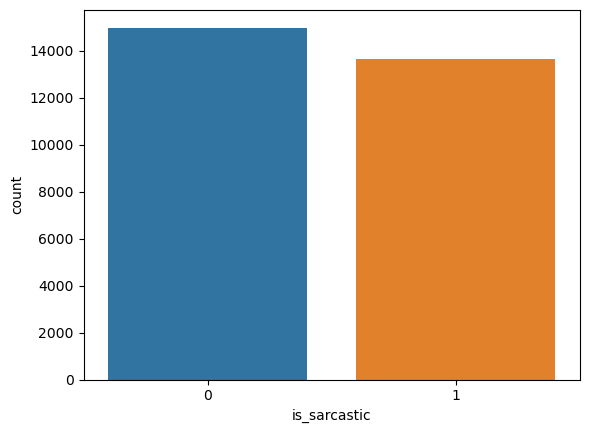

In [50]:
sns.countplot(x=data['is_sarcastic']);

In [51]:
labels = 'Sarcastic', 'Non-sarcastic'
colors = ['red','green']
sizes = percentage

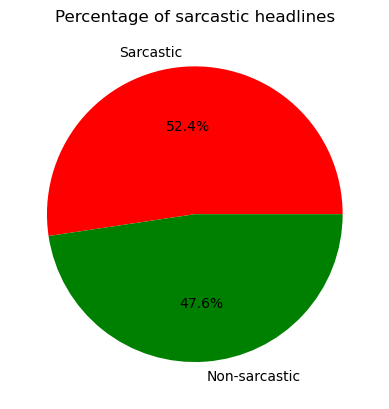

In [52]:
plt.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%')
plt.title('Percentage of sarcastic headlines')
plt.show()

In [53]:
# Q2 - Retain relevant columns

Dropping article_link column :-

In [54]:
data.drop('article_link', axis = 1, inplace = True)

In [55]:
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [56]:
original_data = data.copy()

In [57]:
# Checking random headlines to know length of each sentences and preprocessing steps to be done

In [58]:
data['headline'][20]

'60 journalists killed in 2014 as targeting of international press rises'

In [59]:
len(data['headline'][20])

71

In [60]:
data['is_sarcastic'][20]

0

In [61]:
data['headline'][55]

'brutalist beaver constructs paul rudolph-inspired dam'

In [62]:
len(data['headline'][55])

53

Different sentences have different lengths

As we could not check each and every sentence in headline, we apply some preprocessing steps before we built a model on raw data.

In [63]:
# Converting to lowercase :-
data['cleaned_headline'] = data['headline'].apply(lambda x : x.lower())

In [64]:
# To remove punctuations and extra spaces
def preprocess_text(headline):
    cleaned_headline = re.sub(r'[^\w\s]', '', headline) 
    cleaned_headline = re.sub(r'\s+', ' ', cleaned_headline)  
    return cleaned_headline

In [65]:
data['cleaned_headline'] = data['headline'].apply(lambda x: preprocess_text(x))

In [66]:
print(data['cleaned_headline'])

0        thirtysomething scientists unveil doomsday clo...
1        dem rep totally nails why congress is falling ...
2         eat your veggies 9 deliciously different recipes
3        inclement weather prevents liar from getting t...
4        mother comes pretty close to using word stream...
                               ...                        
28614         jews to celebrate rosh hashasha or something
28615    internal affairs investigator disappointed con...
28616    the most beautiful acceptance speech this week...
28617    mars probe destroyed by orbiting spielberggate...
28618                   dad clarifies this not a food stop
Name: cleaned_headline, Length: 28619, dtype: object


In [67]:
# Q3 - Get length of each sentence

In [68]:
def get_sentence_lengths(data):
    sentences = nltk.sent_tokenize(data)
    lengths = [len(sentence.split()) for sentence in sentences]
    return lengths

In [69]:
lengths = get_sentence_lengths(data['headline'][2])

In [70]:
lengths

[7]

In [71]:
data['line_length'] = data['cleaned_headline'].str.len()

In [72]:
data['line_length']

0        61
1        77
2        48
3        52
4        59
         ..
28614    44
28615    86
28616    71
28617    60
28618    34
Name: line_length, Length: 28619, dtype: int64

In [73]:
# Q4 - Define parameters

Variables that are used to define and control the behavior of model.

Learned during training process.

It has a range of values and are adjusted.

max_features: Number of words to take from tokenizer

maxlen: Maximum length of each sentence

embedding_size: Size of embedding vector

In [74]:
data['max_length'] = data['cleaned_headline'].apply(lambda x: len(x.split(' ')))

In [75]:
max_features = 10000
maxlen = data['max_length'].max()
embedding_size = 50

In [76]:
# Q5 - Get indices for words

Getting indices using tokenizer :- 

In [77]:
tokenizer = Tokenizer(num_words = max_features)

In [78]:
tokenizer.fit_on_texts(list(data['cleaned_headline']))

In [79]:
# Q6 - Create features and labels

In [80]:
# Features 
X = tokenizer.texts_to_sequences(data['cleaned_headline'])

In [81]:
# Labels
y = np.asarray(data['is_sarcastic'])

In order to fit these features into model all sentences are made to same or equal in length by padding sequence

In [82]:
X = pad_sequences(X, maxlen = maxlen)

In [83]:
# Splitting data :-
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [84]:
# Q7 - Get vocabulary size

In [85]:
word_to_index = tokenizer.word_index
vocabulary_size = len(word_to_index)+1

In [86]:
vocabulary_size

29640

In [87]:
# Q8 - Create a weight matrix using GloVe embeddings

In [88]:
embeddings_dict = {}
with open(r"glove.6B.50d.txt", encoding = "utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [89]:
# Create a weight matrix
weight_matrix = np.zeros((vocabulary_size, embedding_size))
for word, index in word_to_index.items():
    embedding_vector = embeddings_dict.get(word)
    weight_matrix[index] = embedding_vector

In [90]:
len(embeddings_dict.values())

400000

In [91]:
# Q9 - Define and compile a Bidirectional LSTM model

A recurrent neural network in which 2 LSTM are present. 

There is no backward propogation, only input can flow in both directions(right to left and left to right)

Advantage :- Can effectively increase amount of information available to the network, improving the context available to the algorithm.

In [92]:
num_words = min(max_features, vocabulary_size) + 1

In [93]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [95]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, model='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [96]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 151, 50)           1482000   
                                                                 
 bidirectional (Bidirectiona  (None, 151, 256)         183296    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,665,553
Trainable params: 1,665,553
No

In [97]:
batch_size = 100
epochs = 5

In [98]:
# Splitting data :-
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [99]:
# Q10 - Fit the model and check the validation accuracy

In [100]:
history = model.fit(x_train, y_train, epochs = epochs, validation_split = 0.2, batch_size = batch_size, callbacks = callbacks, verbose = 2)

Epoch 1/5

Epoch 1: saving model to model_weights.h5
184/184 - 103s - loss: 0.4888 - accuracy: 0.7557 - val_loss: 0.3574 - val_accuracy: 0.8524 - lr: 0.0010 - 103s/epoch - 561ms/step
Epoch 2/5

Epoch 2: saving model to model_weights.h5
184/184 - 111s - loss: 0.2575 - accuracy: 0.8975 - val_loss: 0.3624 - val_accuracy: 0.8439 - lr: 0.0010 - 111s/epoch - 602ms/step
Epoch 3/5

Epoch 3: saving model to model_weights.h5
184/184 - 110s - loss: 0.1776 - accuracy: 0.9305 - val_loss: 0.3874 - val_accuracy: 0.8410 - lr: 0.0010 - 110s/epoch - 600ms/step
Epoch 4/5

Epoch 4: saving model to model_weights.h5
184/184 - 114s - loss: 0.1113 - accuracy: 0.9634 - val_loss: 0.4433 - val_accuracy: 0.8417 - lr: 1.0000e-04 - 114s/epoch - 622ms/step
Epoch 5/5

Epoch 5: saving model to model_weights.h5
184/184 - 112s - loss: 0.0999 - accuracy: 0.9644 - val_loss: 0.4674 - val_accuracy: 0.8412 - lr: 1.0000e-04 - 112s/epoch - 606ms/step


In [101]:
print("Validation accuracy :-")
history.history['val_accuracy']

Validation accuracy :-


[0.852369487285614,
 0.8438523411750793,
 0.8410133123397827,
 0.8416684865951538,
 0.8412317037582397]

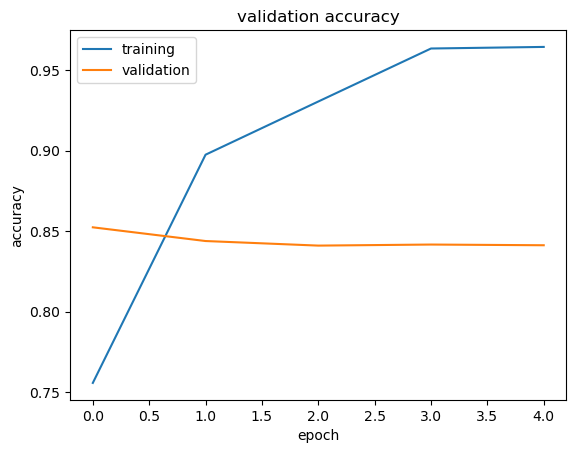

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()